In [1]:
import numpy as np
import pandas as pd

import tqdm

from matplotlib import pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import datetime

import os

In [2]:
CIRCUIT_NAME = "imola"
FIGURES_PATH = os.path.join("..", "figures", CIRCUIT_NAME)
TEAM_COLORS = {
    "Mercedes":"#00D2BE",
    "Custom":(22.6/255.0, 21.1/255.0, 29.0/255.0),
    "Mc Laren":"#FF8700",
    "Ferrari":"#DC0000",
    "Red Bull":"#0600EF",
    "Alpine":"#0090FF",
    "Aston Martin":"#006F62",
    "Haas":"#8c8c8c",
    "Williams":"#005AFF",
    "Alfa Romeo":"#900000",
    "AlphaTauri":"#2B4562",
}

In [3]:
if not os.path.exists(os.path.join("..", "figures")):
    os.mkdir(os.path.join("..", "figures"))
if not os.path.exists(FIGURES_PATH):
    os.mkdir(FIGURES_PATH)

In [4]:
df = pd.read_csv(f"../data/{CIRCUIT_NAME}.csv")
df

,frame,name,time,date,custom,tc,gear,brakes,team
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren
...,...,...,...,...,...,...,...,...,...
54699,190283,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull
54700,190286,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull
54701,190289,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri
54702,190293,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren


In [5]:
# Filters out rows with wrong time
df = df[(df.time.str.count(":") == 1) & (df.time.str.count("\\.") == 1) & (df.date.str.count("/") == 2)]
df = df[df.time.str.len() == 8]
df = df[(df.custom == "Yes") | (df.custom == "No")]
df

,frame,name,time,date,custom,tc,gear,brakes,team
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren
...,...,...,...,...,...,...,...,...,...
54699,190283,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull
54700,190286,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull
54701,190289,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri
54702,190293,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren


In [6]:
# Remove errors in times
df = df[df["time"].str.split(".").str[1].str.len() == 3]
df = df[df["time"].str.split(".").str[0].str.len() == 4]
df

,frame,name,time,date,custom,tc,gear,brakes,team
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren
...,...,...,...,...,...,...,...,...,...
54699,190283,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull
54700,190286,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull
54701,190289,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri
54702,190293,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren


In [7]:
# Time to seconds
df["time_s"] = df.apply(lambda x: 60 * int(x["time"].split(":")[0]) + int(x["time"].split(":")[1].split(".")[0]) + 0.001 * int(x["time"].split(".")[1]), axis=1)
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...
54699,190283,LitDNX3HD,1:16.617,3/2/2022,No,1,0,1,Red Bull,76.617
54700,190286,SMKxx1,1:16.617,3/3/2022,No,0,0,1,Red Bull,76.617
54701,190289,Prospero,1:16.617,22/4/2022,Yes,1,0,0,AlphaTauri,76.617
54702,190293,Nicx,1:16.617,25/4/2022,Yes,0,0,1,Mc Laren,76.617


In [8]:
# Sort by lap time and date
df = df.sort_values(by=["time_s", "date"], ascending=[True, False]).reset_index(drop=True)
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...
48175,90143,Kexs9S3s9,2:15.705,28/3/2022,Yes,1,0,1,Ferrari,135.705
48176,90140,vendxx,2:15.705,21/5/2022,No,1,1,1,Aston Martin,135.705
48177,90137,Weiser,2:15.705,20/3/2022,Yes,1,1,1,Ferrari,135.705
48178,90110,NViax,2:15.705,19/3/2022,Yes,1,1,1,Red Bull,135.705


In [9]:
# Manual filter to filter out obvious mistakes in times
df = df[df["time_s"] <= 77]
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,VaientinBruff,1:13.075,30/11/2021,Yes,0,0,0,Alpine,73.075
1,148,MarcelKiefer,1:13.097,24/4/2022,Yes,0,0,0,Red Bull,73.097
2,151,VeloceVasterrac,1:13.120,29/10/2021,Yes,0,0,0,Red Bull,73.120
3,155,DaniMoreno,1:13.128,2/12/2021,Yes,0,0,0,Mercedes,73.128
4,158,Joshidowu,1:13.137,30/11/2021,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...
48158,190266,cactus,1:16.617,16/12/2021,Yes,0,0,0,Mercedes,76.617
48159,190256,asvensson,1:16.617,15/10/2021,Yes,0,0,1,Red Bull,76.617
48160,190279,yeetDoi,1:16.617,15/10/2021,No,0,0,0,Red Bull,76.617
48161,190249,CptBalloonhands,1:16.617,12/4/2022,No,1,1,1,Alpine,76.617


In [10]:
def check_date(datestr):
    try:
        datetime.datetime.strptime(datestr, "%d/%m/%Y")
        return True
    except:
        return False

In [11]:
# Filters out dates with wrong formats '/x/xxxx', 'x//xxxx', or 'x/x/' or any of their combination
# correct date formatting for easy sorting
df = df[df.date.apply(check_date)]
pd.options.mode.chained_assignment = None
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,VaientinBruff,1:13.075,2021-11-30,Yes,0,0,0,Alpine,73.075
1,148,MarcelKiefer,1:13.097,2022-04-24,Yes,0,0,0,Red Bull,73.097
2,151,VeloceVasterrac,1:13.120,2021-10-29,Yes,0,0,0,Red Bull,73.120
3,155,DaniMoreno,1:13.128,2021-12-02,Yes,0,0,0,Mercedes,73.128
4,158,Joshidowu,1:13.137,2021-11-30,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...
48158,190266,cactus,1:16.617,2021-12-16,Yes,0,0,0,Mercedes,76.617
48159,190256,asvensson,1:16.617,2021-10-15,Yes,0,0,1,Red Bull,76.617
48160,190279,yeetDoi,1:16.617,2021-10-15,No,0,0,0,Red Bull,76.617
48161,190249,CptBalloonhands,1:16.617,2022-04-12,No,1,1,1,Alpine,76.617


In [12]:
# Finally remove duplicate rows if left and reset index
df = df.drop_duplicates(subset=["name","time"]).reset_index()
df

,index,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,0,145,VaientinBruff,1:13.075,2021-11-30,Yes,0,0,0,Alpine,73.075
1,1,148,MarcelKiefer,1:13.097,2022-04-24,Yes,0,0,0,Red Bull,73.097
2,2,151,VeloceVasterrac,1:13.120,2021-10-29,Yes,0,0,0,Red Bull,73.120
3,3,155,DaniMoreno,1:13.128,2021-12-02,Yes,0,0,0,Mercedes,73.128
4,4,158,Joshidowu,1:13.137,2021-11-30,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...,...
46659,48158,190266,cactus,1:16.617,2021-12-16,Yes,0,0,0,Mercedes,76.617
46660,48159,190256,asvensson,1:16.617,2021-10-15,Yes,0,0,1,Red Bull,76.617
46661,48160,190279,yeetDoi,1:16.617,2021-10-15,No,0,0,0,Red Bull,76.617
46662,48161,190249,CptBalloonhands,1:16.617,2022-04-12,No,1,1,1,Alpine,76.617


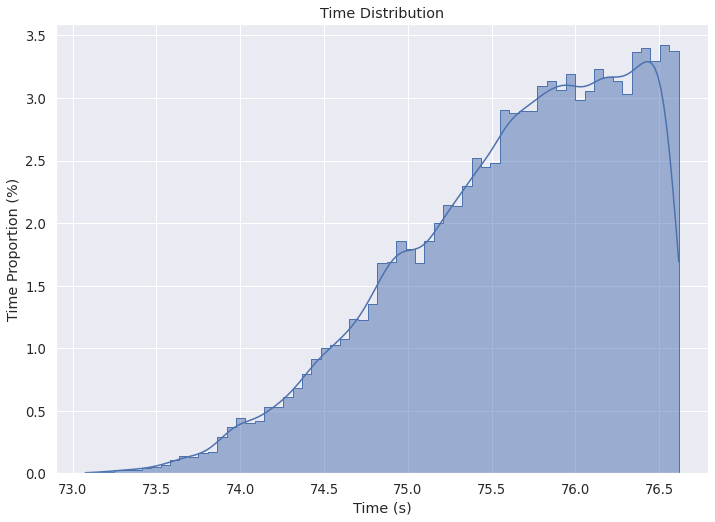

In [22]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.histplot(x="time_s", data=df, kde=True, color="b", element="step", stat="percent")
ax.set(xlabel="Time (s)", ylabel="Time Proportion (%)")
ax.set_title(f"Time Distribution")

plt.savefig(os.path.join(FIGURES_PATH, "time_dist.png"), bbox_inches="tight")
plt.show()

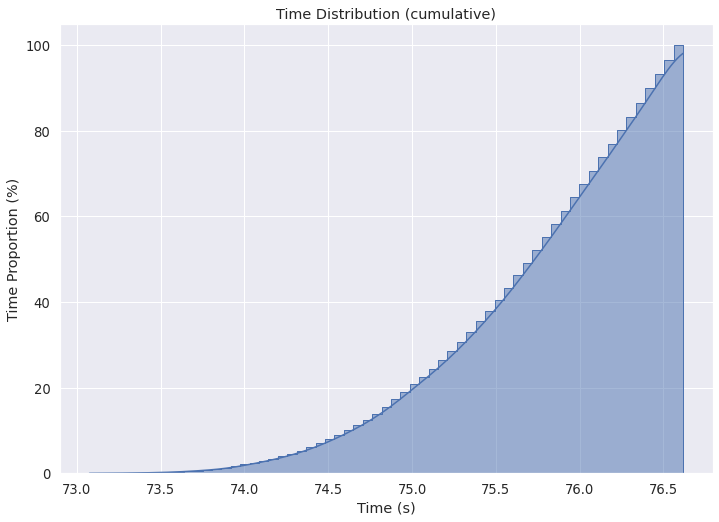

In [21]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.histplot(x="time_s", data=df, kde=True, color="b", element="step", stat="percent", cumulative=True)
ax.set(xlabel="Time (s)", ylabel="Time Proportion (%)")
ax.set_title(f"Time Distribution (cumulative)")
plt.savefig(os.path.join(FIGURES_PATH, "time_cumulative_dist.png"), bbox_inches="tight")
plt.show()

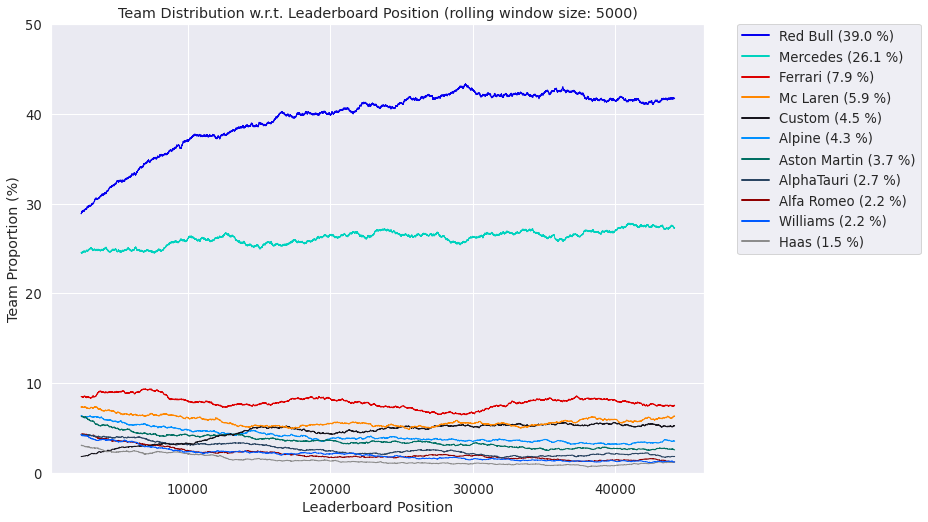

In [24]:
WINDOW_WIDTH = 5000
team_proportions = pd.get_dummies(df.team).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0


rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

ax = sns.lineplot(data=team_proportions, palette=TEAM_COLORS, dashes=False, markers=False, linewidth=1.0)
ax.set(xlabel="Leaderboard Position", ylabel="Team Proportion (%)")
ax.set_title(f"Team Distribution w.r.t. Leaderboard Position (rolling window size: {WINDOW_WIDTH})")

team_labels = []
team_counts = df.groupby("team").count().iloc[:,0]
team_sum = team_counts.sum()
teams_sorted = sorted(TEAM_COLORS.keys(), key= lambda x: team_counts[x], reverse=True)
for team in teams_sorted:
    team_labels.append(f"{team} ({team_counts[team] * 100.0 / team_sum:.1f} %)")

leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=team_labels)

for i, legobj in enumerate(leg.legendHandles):
    legobj.set_color(TEAM_COLORS[teams_sorted[i]])
    legobj.set_linewidth(2.0)

ax.set_ylim([0,50])
plt.savefig(os.path.join(FIGURES_PATH, "team_dist.png"), dpi=100, bbox_inches="tight")
plt.show()

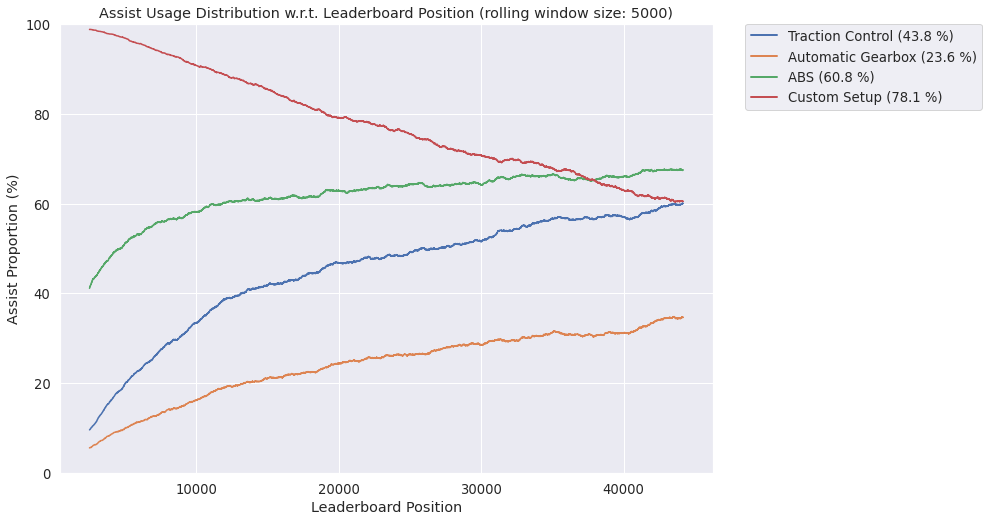

In [25]:
WINDOW_WIDTH = 5000

rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

tc = (pd.get_dummies(df.tc).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
gear = (pd.get_dummies(df.gear).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
brake = (pd.get_dummies(df.brakes).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)[1]
custom = (pd.get_dummies(df.custom).rolling(WINDOW_WIDTH, center=True).sum() / WINDOW_WIDTH * 100.0)["Yes"]

proportions = pd.concat([tc,gear,brake,custom], axis=1)
proportions.columns = ["Traction Control", "Automatic", "ABS", "Custom Setup"]

ax = sns.lineplot(data=proportions, dashes=False, markers=False, linewidth=1.5)
ax.set(xlabel="Leaderboard Position", ylabel="Assist Proportion (%)")
ax.set_title(f"Assist Usage Distribution w.r.t. Leaderboard Position (rolling window size: {WINDOW_WIDTH})")

ax.set_ylim([0,100])

leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

teams_sorted = sorted(TEAM_COLORS.keys(), key= lambda x: team_counts[x], reverse=True)
    
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

assist_labels = [
    f"Traction Control ({df.tc.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"Automatic Gearbox ({df.gear.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"ABS ({df.brakes.sum() * 100.0 / df.shape[0]:.1f} %)",
    f"Custom Setup ({df.groupby('custom').count().iloc[1,0] * 100.0 / df.shape[0]:.1f} %)",
]


leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=assist_labels)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

plt.savefig(os.path.join(FIGURES_PATH, "assist_dist.png"), dpi=100, bbox_inches="tight")
plt.show()

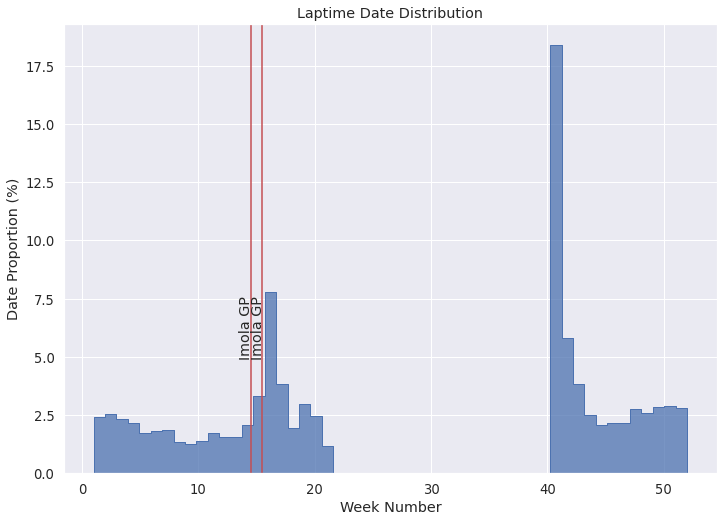

In [28]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)

gp_weeks = [15, 16]

for gp_week in gp_weeks:
    plt.axvline(gp_week-0.5, color="r")
    plt.text(gp_week-1.5, 5,f"{CIRCUIT_NAME.capitalize()} GP", rotation=90)


df["week_num"] = df.date.apply(lambda x:  x.isocalendar()[1])
ax = sns.histplot(x="week_num", data=df, bins=52, element="step", stat="percent")
ax.set(xlabel="Week Number", ylabel="Date Proportion (%)")
ax.set_title(f"Laptime Date Distribution")

plt.savefig(os.path.join(FIGURES_PATH, "weekday_dist.png"), dpi=120, bbox_inches="tight")
plt.show()